<div style="line-height:0.45">
<h1 style="color:#26BBEE  "> Random Forest Regression </h1>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> make_regression + statsmodels + OLS regression + context manager matplotlib styles
</span>
</div>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn import tree
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

In [34]:
# Generate synthetic data
n_samples = 100 
n_features = 6 
n_informative = 3 

X, y, coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative, random_state=None, 
                            shuffle=False, noise=20, coef=True)

In [35]:
# Create dataframes
df1 = pd.DataFrame(data=X, columns=['X' + str(i) for i in range(1, n_features + 1)])
df2 = pd.DataFrame(data=y, columns=['y'])
df = pd.concat([df1,df2], axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,-0.571913,-0.455732,0.048066,0.994505,-0.027549,-0.509149,-2.624291
1,-1.593532,0.537018,1.190168,-0.776769,0.186955,0.536065,27.768190
2,1.129981,0.338975,1.612021,0.633053,0.175759,0.131876,79.713654
3,0.397601,-0.282318,1.113310,1.112681,-0.054995,0.783428,55.000931
4,-2.057325,0.151095,-0.948526,0.505977,-0.015907,-0.798888,-21.045955
5,-1.052337,-0.201970,-1.775899,-0.328770,-2.275682,-0.421816,-52.406625
6,0.034341,1.711683,-0.353896,0.027340,0.559557,-0.322581,86.702735
7,-0.813663,1.597143,0.080681,0.013989,0.039701,1.201713,36.153618
8,0.295673,0.109050,0.391625,1.453662,1.184407,0.173111,9.005497
9,0.142603,-2.403738,1.081313,0.135798,-1.183780,-0.513412,-101.072350


<div style="line-height: 1.9;">
<h3 style="color:#26BBEE; margin-bottom: 0;">Plots:</h3>
</div>
The Context manager provided by the matplotlib library that temporarily applies <br> 
a specific predefined style to all subsequent plots created within the context.

<div style="margin-top: 10px;">
<h5 style="margin-bottom: 0;">Available Styles:</h5> 
</div>

+ seaborn-dark
+ ggplot
+ dark_background
+ classic
+ bmh
+ Solarize_Light2
+ fivethirtyeight
+ seaborn
+ tableau-colorblind10
+ fast
+ grayscale
+ dark_background


In [36]:
######### Scatter plots for each feature against the target variable
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6, 4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='red',s=50,alpha=0.6)

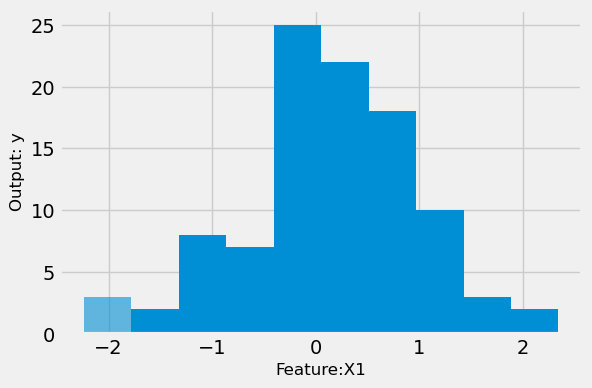

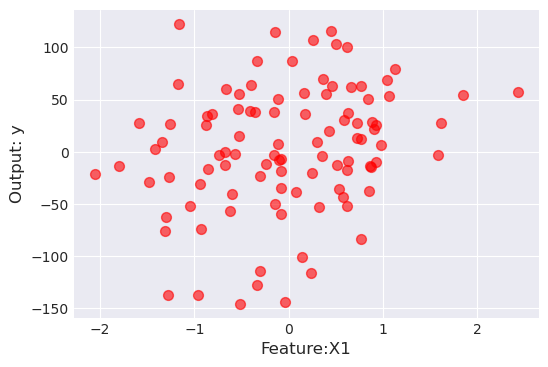

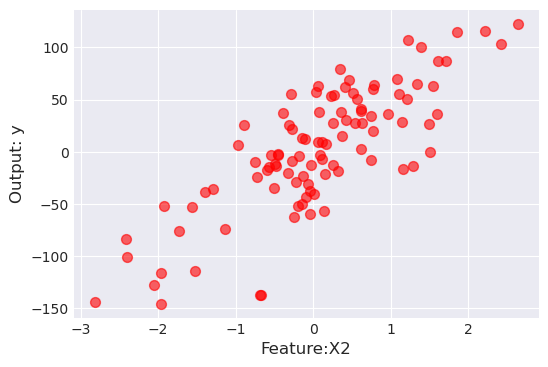

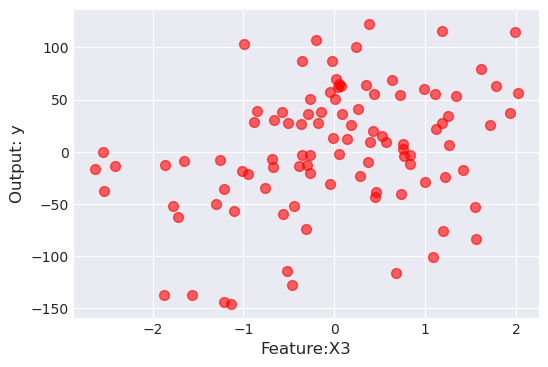

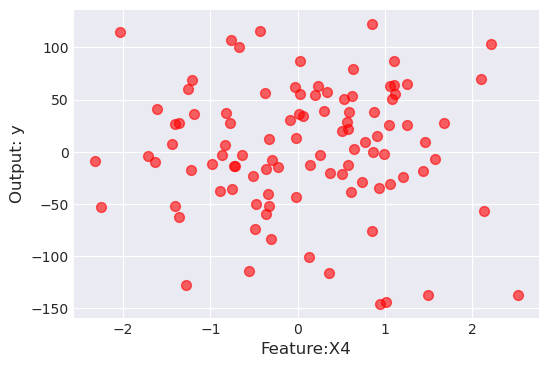

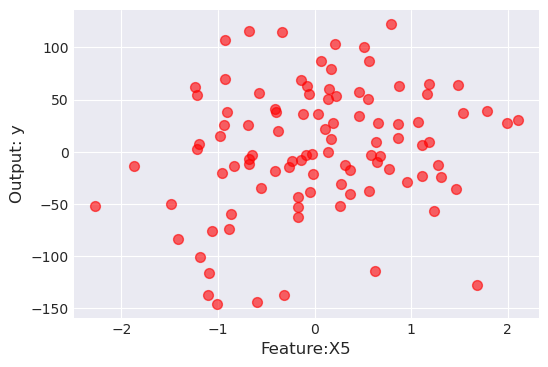

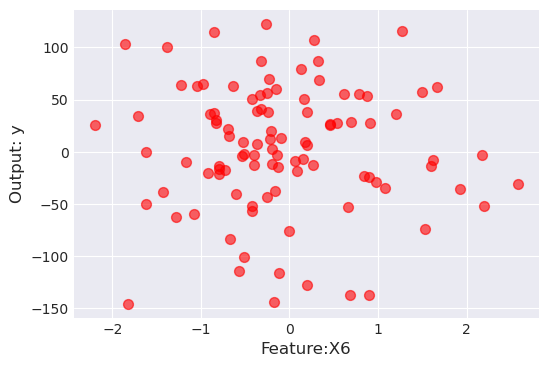

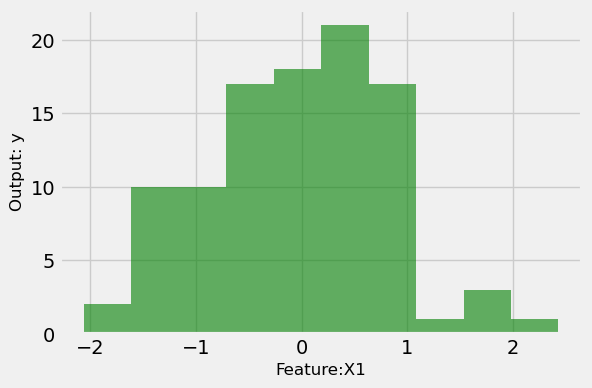

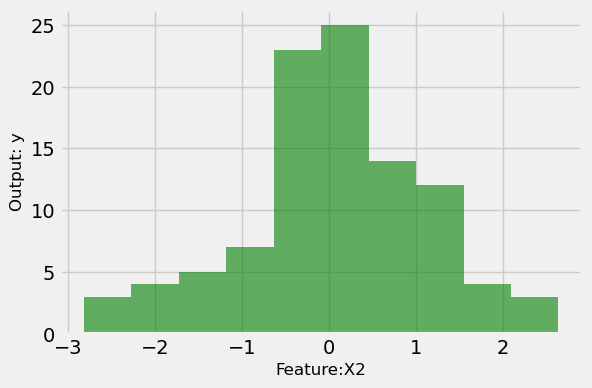

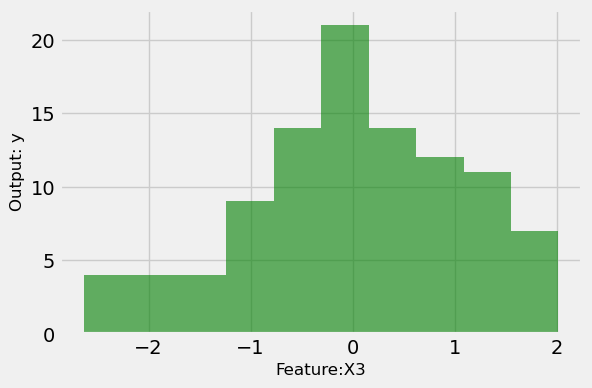

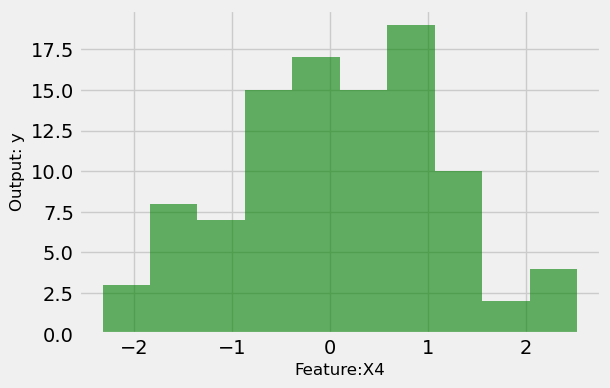

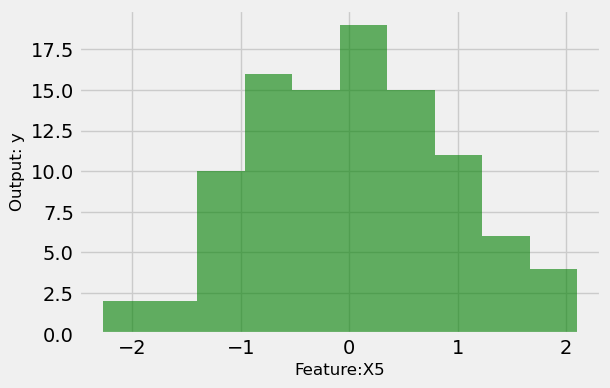

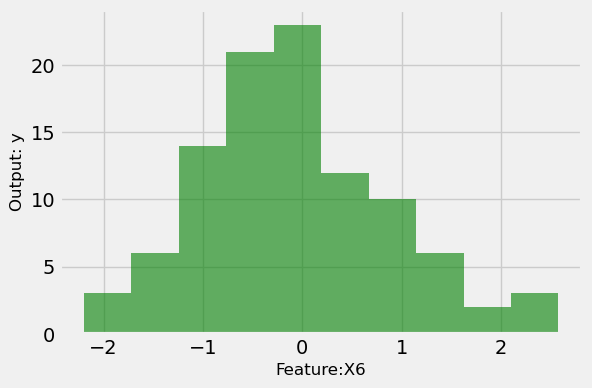

In [37]:
""" Histograms of the feature space. """
with plt.style.context(('fivethirtyeight')):
    for i, col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+ col,fontsize=12)
        plt.ylabel('Output: y', fontsize=12)
        plt.hist(df[col], alpha=0.6, facecolor='g')
        plt.show()
        plt.close()

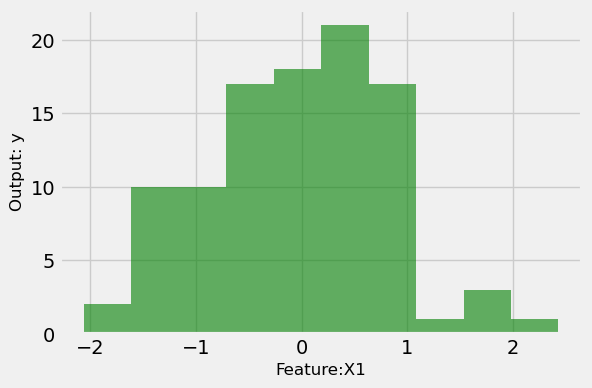

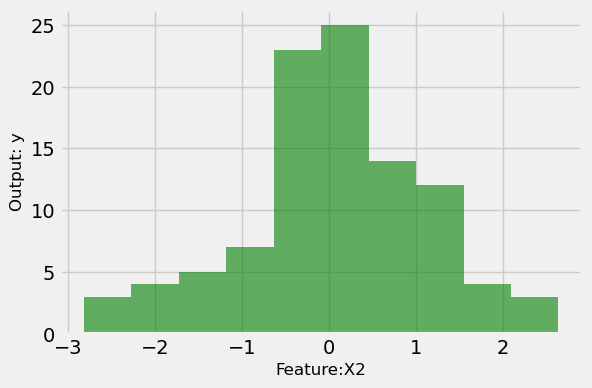

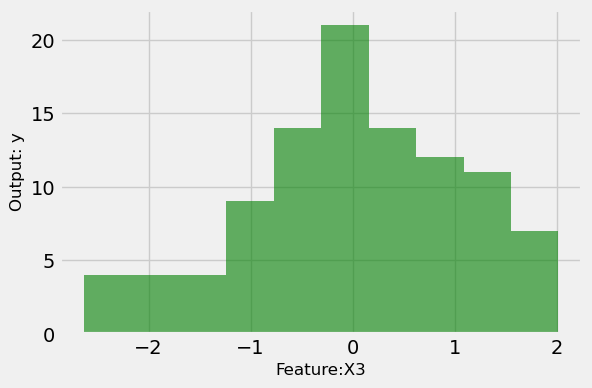

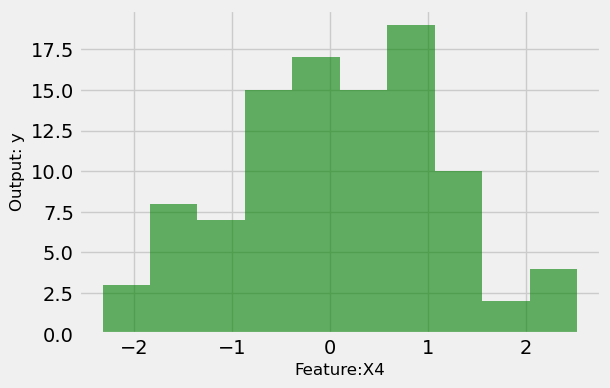

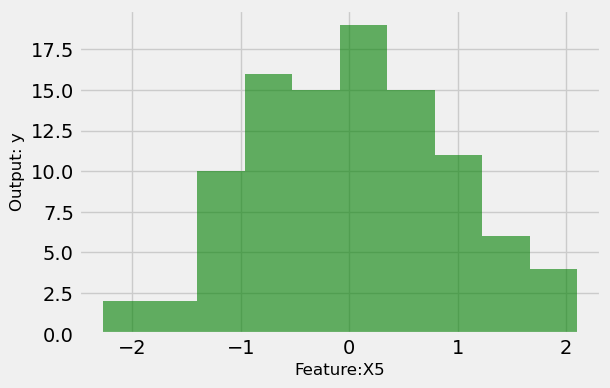

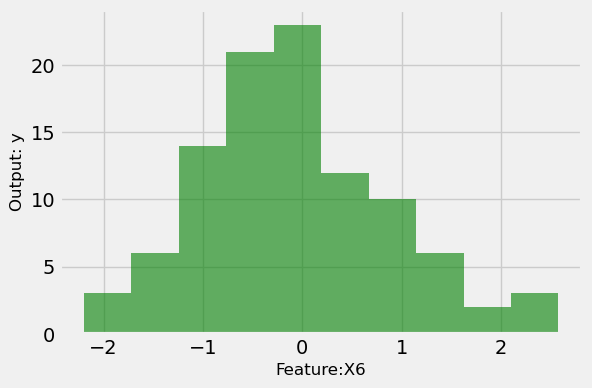

In [38]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:' + col,fontsize=12)
        plt.ylabel('Output: y', fontsize=12)
        plt.hist(df[col], alpha=0.6, facecolor='g')
        plt.show()
        plt.close()

In [39]:
# Train a Decision Tree Regressor model
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(X, y);

In [40]:
# Features importance
print("Relative importance of the features: ", tree_model.feature_importances_)

Relative importance of the features:  [0.03281219 0.73330417 0.13602456 0.08467327 0.00487816 0.00830765]


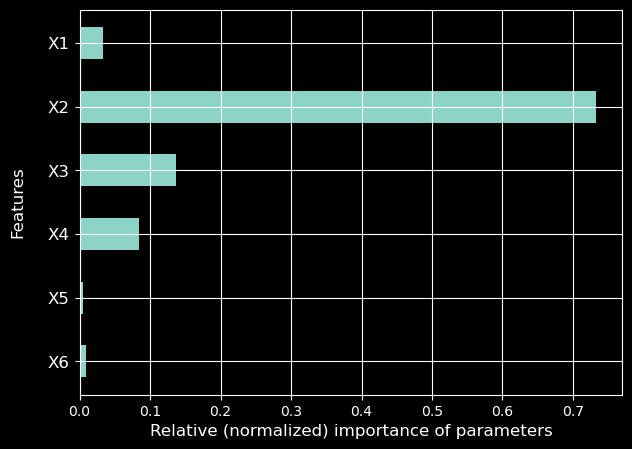

In [41]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(7,5))
    plt.grid(True)
    plt.yticks(range(n_features+1, 1, -1), df.columns[:-1],fontsize=12)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=12)
    plt.ylabel("Features\n",fontsize=12)
    plt.barh(range(n_features+1, 1, -1), width=tree_model.feature_importances_, height=0.5)
    plt.show()
    plt.close()

In [42]:
print("Regression coefficient:",tree_model.score(X, y))

Regression coefficient: 0.9360089531575699


In [43]:
model = RandomForestRegressor(max_depth=5, random_state=None, max_leaf_nodes=5, n_estimators=100)
model.fit(X, y);

In [44]:
print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1, 1, -1), df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters", fontsize=15)
    plt.ylabel("Features\n", fontsize=20)
    plt.barh(range(n_features+1, 1, -1), width=model.feature_importances_,height=0.5)

Relative importance of the features:  [0.03373923 0.84610784 0.08519473 0.01315238 0.01882268 0.00298313]


In [45]:
print("Regression coefficient:", model.score(X, y))

Regression coefficient: 0.8109579677046668


### Ordinary Least Squares regression:

In [46]:
# Add constant term and perform Ordinary Least Squares regression
Xs = sm.add_constant(X)
stat_model = sm.OLS(y, Xs)
stat_result = stat_model.fit()

In [47]:
""" Summary of the OLS regression. """
print(stat_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.45e-38
Time:                        17:58:08   Log-Likelihood:                -450.22
No. Observations:                 100   AIC:                             914.4
Df Residuals:                      93   BIC:                             932.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3497      2.282      0.153      0.8

In [48]:
# Make arrays of regression coefficients estimated by the models
rf_coef = np.array(coef)
stat_coef = np.array(stat_result.params[1:])

In [49]:
df_coef = pd.DataFrame(data=[rf_coef,stat_coef], columns=df.columns[:-1], index=['True Regressors', 'OLS method estimation'])
df_coef

,X1,X2,X3,X4,X5,X6
True Regressors,20.428736,49.669754,17.753915,0.00000,0.000000,0.000000
OLS method estimation,19.342252,48.217911,19.589077,0.04103,1.443903,0.280772


In [50]:
df_importance = pd.DataFrame(data=[model.feature_importances_, stat_result.tvalues[1:] / sum(stat_result.tvalues[1:])],
                            columns=df.columns[:-1],
                            index=['RF Regressor relative importance', 'OLS method normalized t-statistic'])
df_importance

,X1,X2,X3,X4,X5,X6
RF Regressor relative importance,0.033739,0.846108,0.085195,0.013152,0.018823,0.002983
OLS method normalized t-statistic,0.182360,0.565440,0.234326,0.000481,0.014401,0.002992
